In [19]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
pd.set_option('display.max_colum', 500)

In [3]:
df = pd.read_csv('Data/clean_combined_tmdb_data.csv',compression="gzip", low_memory = False)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0308353,0.0,/tuu79CwctvIo4RUg7E3FGkGIg4I.jpg,"{'id': 141084, 'name': ""Happily N'Ever After C...",47000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.happilyneverafterthefilm.com/,5393.0,en,Happily N'Ever After,"An alliance of evil-doers, led by Frieda, look...",11.840,/MjfHDN5WrV6RBVhCvfdlPpt7gH.jpg,"[{'id': 1718, 'logo_path': None, 'name': 'Odys...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2007-01-05,38085778.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Fairy Tale Endings Aren't What They Used To Be.,Happily N'Ever After,0.0,4.9,357.0,PG
1,tt0317219,0.0,/sd4xN5xi8tKRPrJOWwNiZEile7f.jpg,"{'id': 87118, 'name': 'Cars Collection', 'post...",120000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://disney.go.com/disneyvideos/animatedfilm...,920.0,en,Cars,"Lightning McQueen, a hotshot rookie race car d...",77.326,/qa6HCwP4Z15l3hpsASz3auugEW6.jpg,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-08,461983149.0,117.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Ahhh... it's got that new movie smell.,Cars,0.0,6.9,11579.0,G
2,tt0348150,0.0,/8eRscFbRYl681zDfkjv1jjW1KAA.jpg,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.warnerbros.com/movies/superman-ret...,1452.0,en,Superman Returns,Superman returns to discover his 5-year absenc...,30.861,/385XwTQZDpRX2d3kxtnpiLrjBXw.jpg,"[{'id': 429, 'logo_path': '/2Tc1P3Ac8M479naPp1...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-28,391081192.0,154.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,You’ll Believe A Man Can Fly Again!,Superman Returns,0.0,5.7,3444.0,PG-13
3,tt0366548,0.0,/9DUAR7p4SGqt2ISH2lmSzNx3uni.jpg,"{'id': 92012, 'name': 'Happy Feet Collection',...",100000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.warnerbros.com/happy-feet,9836.0,en,Happy Feet,"Into the world of the Emperor Penguins, who fi...",76.506,/zP4CK9O70P8GDilfTkPm4lrmaks.jpg,"[{'id': 2537, 'logo_path': None, 'name': 'Kenn...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2006-11-16,384335608.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,WARNING: May Cause Toe-Tapping.,Happy Feet,0.0,6.1,4218.0,PG
4,tt0382625,0.0,/4NsQl44oXVMiuIM9t7ZsVgYzOkv.jpg,"{'id': 115776, 'name': 'The Robert Langdon Col...",125000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.sonypictures.com/movies/thedavincic...,591.0,en,The Da Vinci Code,A murder in Paris’ Louvre Museum and cryptic c...,31.523,/j9lsWwnIDN2ZNtqZcE1x2o4ZKyI.jpg,"[{'id': 23, 'logo_path': '/mkxNjThahj5pvntvYKV...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-17,767820459.0,149.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Seek the truth,The Da Vinci Code,0.0,6.7,7825.0,PG-13


# The stakeholder's first question:

- does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Null Hypothesis: There is a not significant difference in revenue between MPAA rating groups. 
    
Alternative  Hypothesis: There is a significant difference in revenue between MPAA rating groups. 


## Separating Our Groups

In [4]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in ['G','PG','PG-13','R']:
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [5]:
#Making dataframe with certification G|PG|PG-13|R
rate_df  =  df.loc[df['certification'].str.contains('G|PG|PG-13|R'),:]

## ASSUMPTIONS

### Assumption of Normality

In [6]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
G,35.0,2.170154e-05,21.476255
PG,135.0,6.752330e-08,33.021586
PG-13,236.0,6.338248e-23,102.225709
R,223.0,4.794325e-22,98.178878


In [7]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,35.0,2.170154e-05,21.476255,True
PG,135.0,6.752330e-08,33.021586,True
PG-13,236.0,6.338248e-23,102.225709,True
R,223.0,4.794325e-22,98.178878,True


> We confirm that no group has a normal distribution. However each group is larger than 15, so we can move onto the next assumption. 

###  Equal Variance

In [8]:
stats.levene(*groups.values())

LeveneResult(statistic=33.1879945099394, pvalue=6.489653800820442e-20)

> We failed to met the assumption of equal variance.Therefore I will be using the Nonparametric tests(Kruskal-Wallis).

## Perform and evaluate Kruskal-Wallis test

In [9]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=100.04856791127328, pvalue=1.5172340163565511e-21)

> p-value is < alpha so we reject the null hypothesis. There is a significant difference in revenue between MPAA rating groups. We have supported the alternative hypothesis.

In [10]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(rate_df['revenue'],rate_df['certification'])
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,152001722.5704,0.1007,-18760310.6797,322763755.8204,False
G,PG-13,268515802.1415,0.0001,105450190.1283,431581414.1548,True
G,R,-67855687.2726,0.7092,-231534008.5961,95822634.0508,False
PG,PG-13,116514079.5712,0.0112,19366534.1254,213661625.0169,True
PG,R,-219857409.843,0.0,-318029934.6967,-121684884.9894,True
PG-13,R,-336371489.4142,0.0,-420446256.4831,-252296722.3452,True


> There is a significant difference between G and PG-13, between P and PG, R, and between PG-13 and R.

# Visualization

[Text(0, 0, '183.6m'),
 Text(0, 0, '335.6m'),
 Text(0, 0, '452.1m'),
 Text(0, 0, '115.7m')]

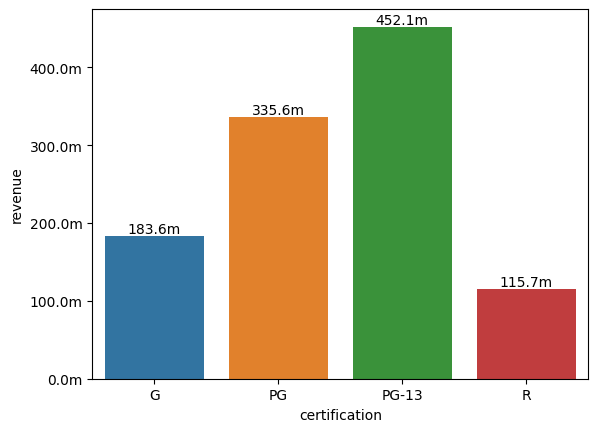

In [37]:
#Convert the tick
def thousands(x, pos):
    return '%1.1fm' % (x * 1e-6)
formatter = FuncFormatter(thousands)
vis = rate_df.groupby('certification')['revenue'].mean().reset_index()
ax = sns.barplot(x='certification',y='revenue', data=vis)
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0],labels= vis['revenue'].apply(lambda x: '%1.1fm' % (x * 1e-6)))

In [34]:
vis['revenue']

                         

0    1.835646e+08
1    3.355663e+08
2    4.520804e+08
3    1.157089e+08
Name: revenue, dtype: float64

> ON average PG-13 tend to have the highest revenue, while R movies tend to have the lowest revenue.